In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.nest import flatten
from keras import metrics
from keras import losses
from keras import optimizers

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train,x_test=x_train/255.0,x_test/255.0

In [4]:
y_train=tf.one_hot(y_train,10)

In [5]:
y_test=tf.one_hot(y_test,10)

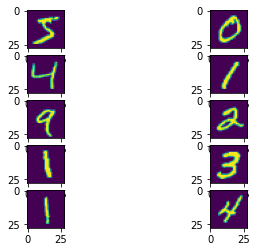

In [6]:
for i in range(10):
    plt.subplot(5,2,i+1)
#     print(y_train[i])
    plt.imshow(x_train[i])
plt.show()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

TensorShape([60000, 10])

In [10]:
y_test.shape

TensorShape([10000, 10])

In [11]:
test_img=x_test[0]

In [12]:
test_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
# Let's build a convolutional neural network with input layer having nodes 784 and output layer having 10 nodes. 

In [14]:
callback=tf.keras.callbacks.EarlyStopping?

In [15]:
model=tf.keras.Sequential()
model.add(InputLayer(input_shape=(28,28,1),name='InputLayer'))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',name='ConvLayer1'))     #output = (28,28,32)
model.add(ReLU(name='ReLU1'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same',name='MaxPool1'))   #output - (14,14,32)
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',name='ConvLayer2'))     #output - (14,14,64)
model.add(ReLU(name='ReLU2'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same',name='MaxPool2'))   #output - (7,7,64)
model.add(Flatten(name='FlattenLayer'))                                                 #output - (1,3136)
model.add(ReLU(name='ReLU3'))
model.add(Dense(10,activation='softmax',name='OutputLayer'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 28, 28, 32)        832       
                                                                 
 ReLU1 (ReLU)                (None, 28, 28, 32)        0         
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 ConvLayer2 (Conv2D)         (None, 14, 14, 64)        51264     
                                                                 
 ReLU2 (ReLU)                (None, 14, 14, 64)        0         
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
                                                                 
 FlattenLayer (Flatten)      (None, 3136)              0

In [16]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=2,verbose=1)
mc=ModelCheckpoint('D:\\Machine Learning Projects\\Handwritten Digit Recognition With CNN\bestmodel.h5',monitor='val_acc',save_best_only=True)
cb=[es,mc]

In [18]:
history=model.fit(x_train,y_train,batch_size=64,epochs=50,validation_split=0.3)

Epoch 1/50
657/657 [==============================] - 33s 49ms/step - loss: 0.1974 - accuracy: 0.9416 - val_loss: 0.0738 - val_accuracy: 0.9768
Epoch 2/50
657/657 [==============================] - 31s 47ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0565 - val_accuracy: 0.9838
Epoch 3/50
657/657 [==============================] - 32s 48ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0486 - val_accuracy: 0.9857
Epoch 4/50
657/657 [==============================] - 31s 47ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0445 - val_accuracy: 0.9877
Epoch 5/50
657/657 [==============================] - 33s 51ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0421 - val_accuracy: 0.9882
Epoch 6/50
657/657 [==============================] - 33s 50ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0456 - val_accuracy: 0.9875
Epoch 7/50
657/657 [==============================] - 35s 53ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0581 - val_accuracy:

In [19]:
# history?

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0526 - accuracy: 0.9911


[0.05260901525616646, 0.991100013256073]

In [21]:
y_pred=model.predict(x_test[:5])

1/1 [==============================] - 0s 130ms/step


In [22]:
y_pred

array([[8.10323469e-28, 3.27413160e-33, 1.29956794e-22, 1.26831757e-20,
        6.06142245e-38, 1.10298863e-28, 0.00000000e+00, 1.00000000e+00,
        3.28839682e-28, 6.71905266e-19],
       [1.43097522e-23, 1.73319566e-26, 1.00000000e+00, 3.44208566e-35,
        4.92359482e-32, 0.00000000e+00, 1.26325656e-21, 2.72148725e-38,
        5.00674717e-30, 2.01677535e-30],
       [1.13873664e-18, 1.00000000e+00, 6.71093633e-14, 1.49670027e-23,
        1.09852884e-10, 1.31786787e-17, 4.37011674e-13, 1.63631153e-12,
        2.90746732e-10, 8.93942818e-15],
       [1.00000000e+00, 2.57709860e-35, 1.10845718e-17, 1.67260947e-23,
        8.58253646e-25, 5.43865760e-20, 1.77674065e-13, 5.74965386e-19,
        5.58045944e-18, 7.26159216e-19],
       [2.09417509e-28, 1.21390329e-28, 1.58844026e-24, 5.17591448e-38,
        1.00000000e+00, 2.26817917e-30, 1.74726744e-28, 2.23686989e-28,
        1.31442036e-22, 2.21329961e-20]], dtype=float32)

In [23]:
for i in range(len(y_pred)):
    idx=np.argmax(y_pred[i],axis=0)
    print(idx)

7
2
1
0
4


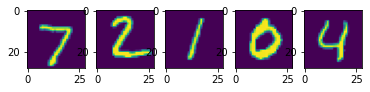

In [24]:
for i in range(5):
    plt.subplot(1,5,i+1)
#     print(y_train[i])
    plt.imshow(x_test[i])
plt.show()